# Regularization

# Early Stopping Technique


Early stopping is a technique by which we can identify where to stop our network and when to stop our network.

### Introduction to Early Stopping

In machine learning, early stopping is one of the most widely used regularization techniques to deal with overfitting issue.

    Early Stopping monitors the performance of the model for every epoch on a held-out validation set during the training, and terminate the training conditional on the validation performance.

    Early Stopping is a very different way to regularize the machine learning model. 
    The way it does is to stop training as soon as the validation error reaches a minimum. 
    The figure below shows a model being trained

*Whether u r training ur dataset or whether u r validating ur dataset ur error should reduce.*

### Overfitting of data 

When algorithm keeps on learning but a time may come it has learnt so well that it is not able to perform well on test data. Learnt well means -> it is decided by weights we have got. Ultimately objective is to determine optimal value of weights in neural n/w model which can be used again also for similar data if weights r optimized. If model trained too well on training means u obtained wrong weights & hence these can't be used for any other purpose.

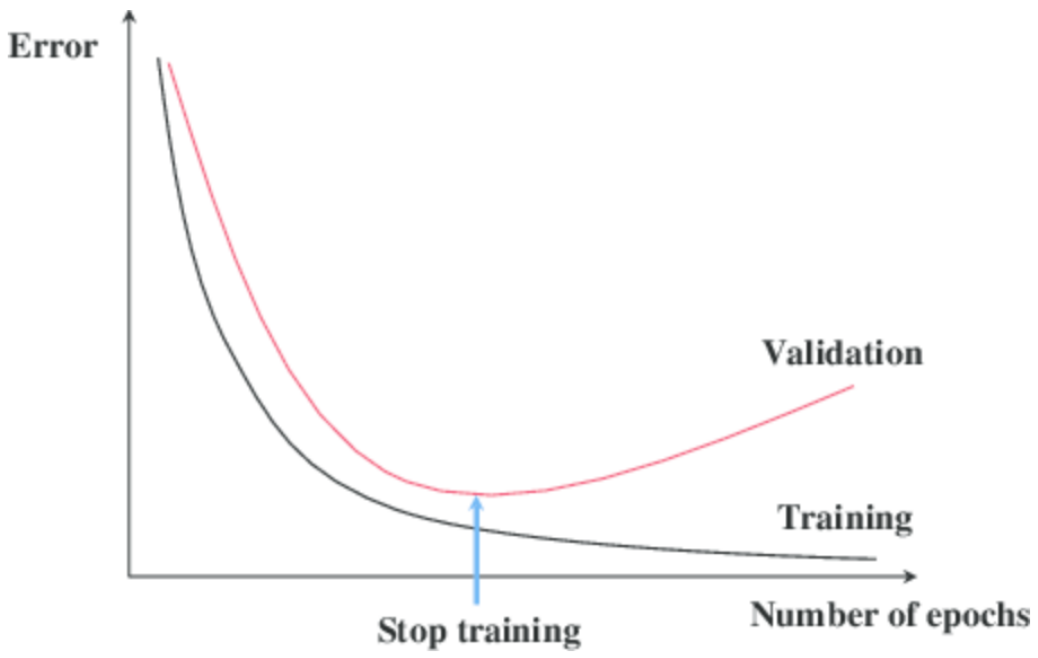

##### 1. As the epochs go by, the algorithm learns and its error on the training set naturally goes down, and so does its error on the validation set. 
##### 2. However, after a while, the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. 
##### 3. With Early Stopping, we can stop training as soon as the validation error reaches the minimum.

To handle this lets say n/w has been given epochs of 50 then we add a condition to it if value is not improving even after continuous 10 epochs we should stop of algorithm. Or can set condition on accuracy level/error also. Basically we need to add a threshold.

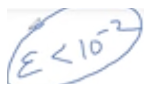

### Dataset used
    Anderson Iris flower (iris) dataset for demonstration. The dataset contains a set of 150 records under five attributes: sepal length, sepal width, petal length, petal width, and class (known as target from sklearn datasets).

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

## Exploring Data

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

## Build a neural network

All layers here are fully connected or dense layers. Activation function will process the information when it is moving from one node to another node.

- Simplicity of data is not just about amount of data we r having it is also about relationship variables have with each other.
- For simple dataset 2 or 3 layers r also sufficient and then u can increase number of epochs also.
- If it is complex data i.e. u r not able to find any relationship b/w variables that r available there or none of variables r correlated with each other which is giving u a huge dataset then u may need a bigger neural n/w.

### Factors affecting Complexity of Data

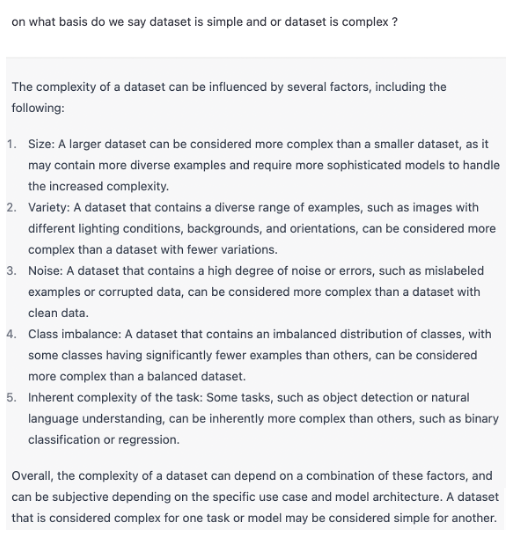

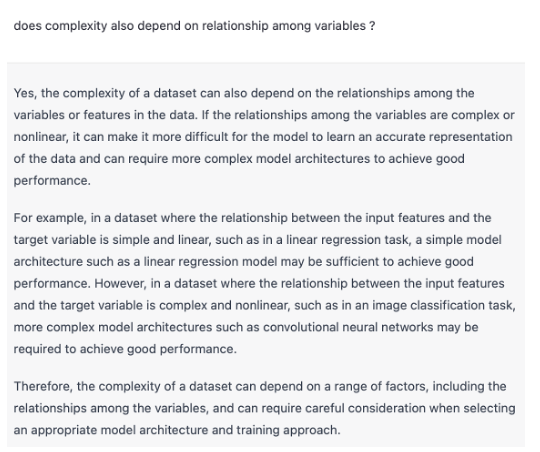

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),   # 3 labels in our dataset
    ])
    return model

### Model specifications:

    The first layer (also known as the input layer) has the input_shape to set the input size (4,)
    The input layer has 64 units, followed by 3 dense layers, each with 128 units. Then there are further 3 dense layers, each with 64 units. All these layers use the ReLU activation function.
    The output Dense layer has 3 units and the softmax activation function.

In [9]:
model = create_model()

2023-04-01 17:12:12.737561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile and train the model

    For training the model, the following is used:
    
    Adam (adam) optimization algorithm as optimizer
    Categorical cross-entropy loss function (categorical_crossentropy) for our multiple-class classification problem where our data is in category.
    Accuracy as our evaluation metrics 

In [10]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

Keras has got more options for optimization in comparison to scikit learn.

### Fit the model to the training data

In [11]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 0s - loss: 1.0760 - accuracy: 0.4643 - val_loss: 1.0346 - val_accuracy: 0.3571 - 425ms/epoch - 142ms/step
Epoch 2/200
3/3 - 0s - loss: 0.9824 - accuracy: 0.5595 - val_loss: 0.9179 - val_accuracy: 0.5714 - 18ms/epoch - 6ms/step
Epoch 3/200
3/3 - 0s - loss: 0.8681 - accuracy: 0.6667 - val_loss: 0.7824 - val_accuracy: 0.5714 - 18ms/epoch - 6ms/step
Epoch 4/200
3/3 - 0s - loss: 0.7477 - accuracy: 0.6667 - val_loss: 0.6646 - val_accuracy: 0.5714 - 18ms/epoch - 6ms/step
Epoch 5/200
3/3 - 0s - loss: 0.6292 - accuracy: 0.6667 - val_loss: 0.5718 - val_accuracy: 0.5714 - 18ms/epoch - 6ms/step
Epoch 6/200
3/3 - 0s - loss: 0.5279 - accuracy: 0.6905 - val_loss: 0.4339 - val_accuracy: 0.9643 - 18ms/epoch - 6ms/step
Epoch 7/200
3/3 - 0s - loss: 0.4299 - accuracy: 0.9405 - val_loss: 0.3530 - val_accuracy: 1.0000 - 17ms/epoch - 6ms/step
Epoch 8/200
3/3 - 0s - loss: 0.3610 - accuracy: 0.9524 - val_loss: 0.2619 - val_accuracy: 0.9643 - 19ms/epoch - 6ms/step
Epoch 9/200
3/3 - 0s - loss: 

Epoch 69/200
3/3 - 0s - loss: 0.0961 - accuracy: 0.9881 - val_loss: 0.1434 - val_accuracy: 0.9286 - 18ms/epoch - 6ms/step
Epoch 70/200
3/3 - 0s - loss: 0.1789 - accuracy: 0.9286 - val_loss: 0.1051 - val_accuracy: 0.9286 - 18ms/epoch - 6ms/step
Epoch 71/200
3/3 - 0s - loss: 0.1132 - accuracy: 0.9286 - val_loss: 0.0383 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 72/200
3/3 - 0s - loss: 0.1078 - accuracy: 0.9643 - val_loss: 0.0418 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 73/200
3/3 - 0s - loss: 0.1014 - accuracy: 0.9643 - val_loss: 0.0523 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 74/200
3/3 - 0s - loss: 0.0961 - accuracy: 0.9643 - val_loss: 0.1179 - val_accuracy: 0.9286 - 18ms/epoch - 6ms/step
Epoch 75/200
3/3 - 0s - loss: 0.1503 - accuracy: 0.9286 - val_loss: 0.0872 - val_accuracy: 0.9286 - 17ms/epoch - 6ms/step
Epoch 76/200
3/3 - 0s - loss: 0.1108 - accuracy: 0.9286 - val_loss: 0.0534 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 77/200
3/3 - 0s - 

Epoch 136/200
3/3 - 0s - loss: 0.0724 - accuracy: 0.9881 - val_loss: 0.0292 - val_accuracy: 1.0000 - 17ms/epoch - 6ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0764 - accuracy: 0.9643 - val_loss: 0.0232 - val_accuracy: 1.0000 - 17ms/epoch - 6ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0898 - accuracy: 0.9643 - val_loss: 0.0193 - val_accuracy: 1.0000 - 17ms/epoch - 6ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0769 - accuracy: 0.9643 - val_loss: 0.0257 - val_accuracy: 1.0000 - 21ms/epoch - 7ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0697 - accuracy: 0.9881 - val_loss: 0.0347 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0737 - accuracy: 0.9762 - val_loss: 0.0177 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0736 - accuracy: 0.9762 - val_loss: 0.0197 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 143/200
3/3 - 0s - loss: 0.0715 - accuracy: 0.9762 - val_loss: 0.0210 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 144/200
3/

In [12]:
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

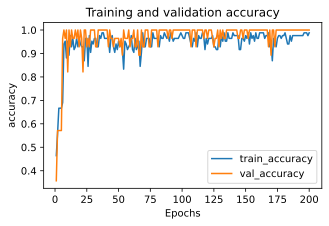

In [13]:
plt.figure(figsize=(5,3))
plot_metric(history, 'accuracy')

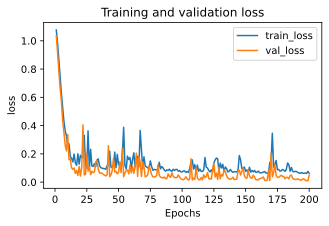

In [14]:
plt.figure(figsize=(5,3))
plot_metric(history, 'loss')

This is a normal graph 0.0 to 1.0 range, this is not a blown up graph like graphs we get below after applying early stopping.

Accuracy and Loss graph can help you in accessing performance of neural n/w u have created. Above is good model, train & validation curves overlapping but only problem is it is continuing upto 200 epochs. So unnecessarily increasing time of execution.

Is it possible we could have obtained this result in lesser num of epochs that is what we will check with early stopping in Keras

## Adding Early Stopping

The Keras module contains a built-in callback designed for Early Stopping

Import EarlyStopping callback

### EarlyStopping() with default settings

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping() # by default, monitor='val_loss' and patience=1

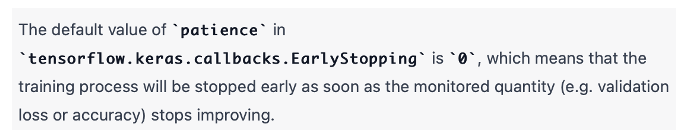

Rather than giving entire dataset at one time we r giving in batches, here 40 samples at a time.

**Early stopping we will be defining when fitting a model i.e. during execution of model**

In [16]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0793 - accuracy: 0.9643 - val_loss: 0.0375 - val_accuracy: 1.0000 - 35ms/epoch - 12ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0625 - accuracy: 0.9881 - val_loss: 0.0251 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step


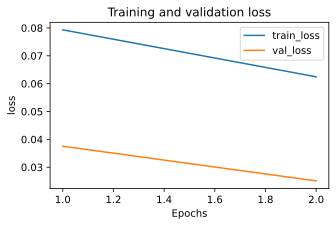

In [17]:
plt.figure(figsize=(5,3))

plot_metric(history, 'loss')

*Above is a blown up graph, only showing from 0.03 to 0.10 on y-axis and only 2 epochs. If you plot on normal scale as was without early stoppping u can see lines are overlapping already so training stopped*

### EarlyStopping() default settings:

    monitor='val_loss': to use validation loss as performance measure to terminate the training.
    patience=0: is the number of epochs with no improvement. 
    `The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.`

    Next, pass the callback object to model.fit() method.

### Customizing Early Stopping

Besides `monitor` and `patience`, the other 2 options are `min_delta` and `mode`, which are also used quite often.

    monitor='val_loss': to use validation loss as performance measure to terminate the training.
    patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.
    min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
    mode='auto': can be auto, min or max. 
    In 'min' mode, training will stop when the quantity monitored has stopped decreasing; 
    in 'max' mode it will stop when the quantity monitored has stopped increasing; 
    in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.

#### An example of a customized early stopping:

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

    monitor='val_accuracy' to use validation accuracy as performance measure to terminate the training. 
    patience=8 means the training is terminated as soon as 8 epochs with no improvement. 
    min_delta=0.001 means the validation accuracy has to improve by at least 0.001 for it to count as an improvement. 
    mode='max' means it will stop when the quantity monitored has stopped increasing.

Let’s go ahead and run it with the customized early stopping.

## Customizing Early Stopping

delta implies u r talking about difference in 2 entities. In beginning error b/w 2 epochs will be large & as algorithm comes to converging, error b/w 2 epochs will decrease.

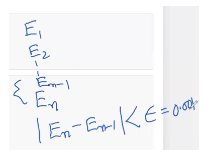

In [18]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001,   # difference b/w 2 validation accuracies
    mode='max'         # monitor='val_accuracy' has stopped increasing
)

In [19]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0730 - accuracy: 0.9762 - val_loss: 0.0246 - val_accuracy: 1.0000 - 33ms/epoch - 11ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0770 - accuracy: 0.9762 - val_loss: 0.0379 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0673 - accuracy: 0.9881 - val_loss: 0.0344 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0669 - accuracy: 0.9881 - val_loss: 0.0310 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0649 - accuracy: 0.9881 - val_loss: 0.0290 - val_accuracy: 1.0000 - 19ms/epoch - 6ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0614 - accuracy: 0.9881 - val_loss: 0.0501 - val_accuracy: 0.9643 - 18ms/epoch - 6ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0858 - accuracy: 0.9643 - val_loss: 0.0997 - val_accuracy: 0.9643 - 18ms/epoch - 6ms/step
Epoch 8/200
3/3 - 0s - loss: 0.1216 - accuracy: 0.9524 - val_loss: 0.0173 - val_accuracy: 1.0000 - 18ms/epoch - 6ms/step
Epoch 9/200
3/3 - 0s - loss: 0.

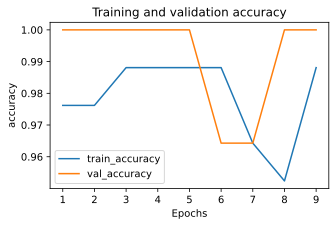

In [20]:
plt.figure(figsize=(5,3))

plot_metric(history, 'accuracy')

Above is a blown up graph, only showing from 0.96 to 1.00 in y-axis. If u plot in normal range u will see lines are overlapping & so .

This dataset is so well that only in 2 epochs also it gave result with default patience=0 but when u try patience=8 then it stopped in 9th epoch itself means it was already able to reach desired accuracy in initial 1-2 epochs.

This time, the training gets terminated at Epoch 9 as there are 8 epochs with no improvement on validation accuracy (It has to be ≥ 0.001 to count as an improvement). For a clear picture, let’s look at a plot representation of accuracy by running plot_metric(history, 'accuracy'). In the below graph, validation accuracy is shown in orange and it’s clear that validation accuracy hasn’t got any improvement.
That’s it



**Note** 

*Since this is a well behaved dataset, we cannot see like the 1st curve in this nb which shows overfitting of data & we need to stop early to avoid overfitting but is we use some complex data apart from iris we may observe this phenomenon.*

## Reference books

    [1] Hands-on Machine Learning with scikit-learn, keras, and tensorflow: concepts, tools, and techniques to build intelligent system
    [2] Keras Official Documentation for Early Stopping